# Numerische Methoden für Differentialgleichungen

## Aufgabenblatt 3
*gelöst von Stollmayer Max*

### Aufgabe 1

Sei $y_{n+1} = y_n + h\ \Phi (t_n, y_n, h)$ eine explizite Ein-Schritt-Methode mit $\Phi (t, y, h) = a_1\ f(t,y) + a_2\ f\big(t+b_2\ h,\ y+ b_2\ h\ f(t,y)\big)$ und Koeffizienten $a_1 = \frac{1}{4},\ a_2 = \frac{3}{4},\ b_2 = \frac{2}{3}$ für das Modellproblem $y' = -\lambda\ y$ mit $\lambda > 0$.

Die Folge $(y_n)_{n \ge 0}$ ist genau dann beschränkt, wenn $0 \le h \le \frac{2}{\lambda}$ gilt.

#### Beweis
Für $y' = \lambda\ y$ ist $f(t,y) = f(y) = -\lambda\ y$. Damit lässt sich $y_{n+1}$ explizit hinschreiben:

\begin{align*}
y_{n+1} &= y_n + h\ \bigg(\frac{1}{4}\ f(y_n) + \frac{3}{4}\ f\big(y_n + \frac{2}{3}\ h\ f(y_n)\big)\bigg) \\
&= y_n + h\ \bigg(-\frac{1}{4}\ \lambda\ y_n - \frac{3}{4}\ \lambda\ y_n + \frac{3}{4}\ \frac{2}{3}\ h\ \lambda^2\ y_n\big)\bigg) \\
&= \big(1 - \frac{\lambda}{4}\ h - \frac{3\ \lambda}{4}\ h + \frac{\lambda^2}{2}\ h^2\big)\ y_n \\
&= \big(1 - \lambda\ h + \frac{\lambda^2}{2}\ h^2\big)\ y_n \\
&= \ ... \\
&= \big(1 - \lambda\ h + \frac{\lambda^2}{2}\ h^2\big)^{n+1}\ y_0
\end{align*}

Die geometrische Folge $(y_n)_{n \ge 0}$ ist nun genau dann beschränkt, wenn $|1 - \lambda\ h + \frac{\lambda^2}{2}\ h^2| \le 1$ gilt, also äquivalent, wenn $-2 \le \frac{\lambda^2}{2}\ h^2 - \lambda\ h \le 0$.

$\bullet \quad$ $-2 \le \frac{\lambda^2}{2}\ h^2 - \lambda\ h \iff \frac{\lambda^2}{2}\ h^2 - \lambda\ h + 2 \ge 0 $, was für jedes $h \in \mathbb{R}$ und $\lambda > 0$ gilt.

$\bullet \quad$ $\frac{\lambda^2}{2}\ h^2 - \lambda\ h \le 0 \iff h\ (\lambda\ h - 2) \le 0 \iff \begin{cases}h \le 0 \land \lambda\ h - 2 \ge 0 \\ h \ge 0 \land \lambda\ h - 2 \le 0 \end{cases} \iff h \ge 0 \land h \le \frac{2}{\lambda}$

Da für $h \le 0$ die Ungleichung $\lambda\ h - 2 \le 0$ nicht gelten kann, ist die Behauptung $0 \le h \le \frac{2}{\lambda}$ gezeigt.
<div style="width:12px; height:12px; border:1px solid #000; margin-left:auto; margin-right:0;"></div>

### Aufgabe 2

Zu implementieren ist das Rückwärts-Euler-Verfahren, sowie das Crank-Nicolson-Verfahren mithilfe der Fixpunkt-Iteration.

#### Definitions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = [12.8, 7.2]

In [2]:
def fixed_point_iter(f, y0, *args, tol=0.01, steps=100):
    '''
    Returns approximated fixed point of given function if found using a simple
    fixed point iteration.

    f ....... function with y as first positional argument
    y0 ...... initial value of iteration
    *args ... static arguments of f
    tol ..... tolerance of approximation to stop iterating
    steps ... maximum number of iterations before divergence is declared
    '''

    y = np.zeros(steps) if isinstance(y0, (int, float)) else np.zeros((steps, np.size(y0)))
    y[0] = y0

    for n in range(0, steps):
        y[n+1] = f(y[n], *args)

        if np.allclose(y[n+1], y[n], atol=tol):
            return y[n+1]

    else:
        print(f"Fixed-point iteration did not converge in {steps} steps. Returned initial value.")
        return y0

In [3]:
def forward_euler(f, y0, t0, tN, N):
    '''
    Returns list of function values approximated with the forward Euler method.

    f .... function of ODE y' = f(y, t)
    y0 ... initial value
    t0 ... start of interval
    tN ... end of interval
    N .... number of steps
    '''

    h = (tN - t0) / N
    t = t0 + h * np.arange(N+1)
    
    y = np.zeros(N+1) if isinstance(y0, (int, float)) else np.zeros((N+1, np.size(y0)))
    y[0] = y0

    for n in range(N):
        y[n+1] = y[n] + h * f(y[n], t[n])

    return t, y

In [4]:
def backward_euler(f, y0, t0, tN, N, tol=0.01):
    '''
    Returns list of input values and list of corresponding function values
    approximated with the backward Euler method.

    f ..... function of ODE y' = f(y, t)
    y0 .... initial value y(t0) = y0
    t0 .... starting point of interval
    tN .... end point of interval
    N ..... number of steps
    tol ... tolerance of approximation to stop iterating
    '''

    h = (tN - t0) / N
    t = t0 + h * np.arange(N+1)

    y = np.zeros(N+1) if isinstance(y0, (int, float)) else np.zeros((N+1, np.size(y0)))
    y[0] = y0

    def g(y_iter, t_n, y_n):
        return y_n + h * f(y_iter, t_n)

    for n in range(N):
        y[n+1] = fixed_point_iter(g, y[n], t[n], y[n], tol=tol)

    return t, y

In [5]:
def crank_nicolson(f, y0, t0, tN, N, tol=0.01):
    '''
    Returns list of input values and list of corresponding function values
    approximated with the Crank-Nicolson method.

    f ..... function of ODE y' = f(y, t)
    y0 .... initial value y(t0) = y0
    t0 .... starting point of interval
    tN .... end point of interval
    N ..... number of steps
    tol ... tolerance of approximation to stop iterating
    '''

    h = (tN - t0) / N
    t = t0 + h * np.arange(N+1)

    y = np.zeros(N+1) if isinstance(y0, (int, float)) else np.zeros((N+1, np.size(y0)))
    y[0] = y0

    def g(y_iter, t_next, y_n, t_n):
        return y_n + h/2 * (f(y_n, t_n) + f(y_iter, t_next))

    for n in range(N):
        y[n+1] = fixed_point_iter(g, y[n], t[n+1], y[n], t[n], tol=tol)

    return t, y

#### Test 1
$y'(t) = y(t)$

In [6]:
def f1(y, t):
    return y

y1_0 = 1
t1_0 = 1
t1_N = 4
N1 = 10

In [7]:
t1_fe, y1_fe = forward_euler(f1, y1_0, t1_0, t1_N, N1)
t1_be, y1_be = backward_euler(f1, y1_0, t1_0, t1_N, N1)
t1_cn, y1_cn = crank_nicolson(f1, y1_0, t1_0, t1_N, N1)

print("Steps:", end="\t\t\t")
print(*[f"{x:5.2f}" for x in t1_fe], sep=" | ")
print(*["-" for n in range(0,109)], sep="")

print("Forward Euler method:", end="\t")
print(*[f"{z:5.2f}" for z in y1_fe], sep=" | ")

print("Backward Euler method:", end="\t")
print(*[f"{z:5.2f}" for z in y1_be], sep=" | ")

print("Crank-Nicolson method:", end="\t")
print(*[f"{z:5.2f}" for z in y1_cn], sep=" | ")

print("Exact solution:", end="\t\t")
print(*[f"{np.exp(t-1):5.2f}" for t in t1_cn], sep=" | ")

Steps:			 1.00 |  1.30 |  1.60 |  1.90 |  2.20 |  2.50 |  2.80 |  3.10 |  3.40 |  3.70 |  4.00
-------------------------------------------------------------------------------------------------------------
Forward Euler method:	 1.00 |  1.30 |  1.69 |  2.20 |  2.86 |  3.71 |  4.83 |  6.27 |  8.16 | 10.60 | 13.79
Backward Euler method:	 1.00 |  1.43 |  2.03 |  2.90 |  4.15 |  5.92 |  8.46 | 12.08 | 17.25 | 24.64 | 35.20
Crank-Nicolson method:	 1.00 |  1.35 |  1.83 |  2.47 |  3.34 |  4.52 |  6.12 |  8.28 | 11.20 | 15.15 | 20.50
Exact solution:		 1.00 |  1.35 |  1.82 |  2.46 |  3.32 |  4.48 |  6.05 |  8.17 | 11.02 | 14.88 | 20.09


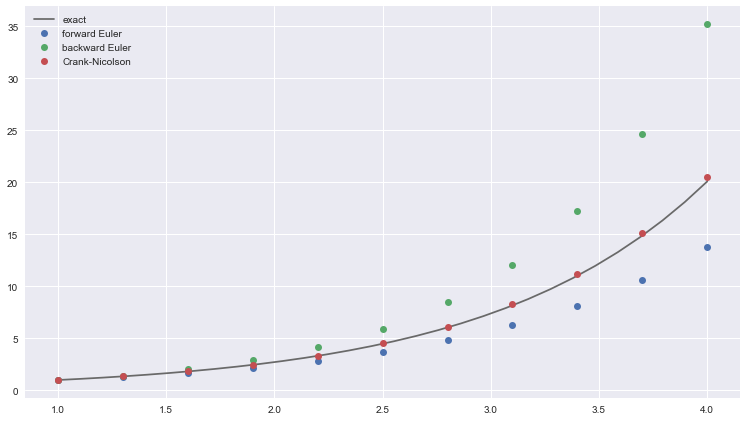

In [8]:
t1_ex = np.linspace(t1_0, t1_N, 30)
y1_ex = np.exp(t1_ex - 1)

plt.plot(t1_ex, y1_ex, "dimgray", label="exact")
plt.plot(t1_fe, y1_fe, "o", label="forward Euler")
plt.plot(t1_be, y1_be, "o", label="backward Euler")
plt.plot(t1_cn, y1_cn, "o", label="Crank-Nicolson")
plt.legend()
plt.show()

#### Test 2
Lotka-Volterra equations

In [9]:
def g(y, t, a, b, c, d):
    predator = b * y[0] * y[1] - a * y[0]
    prey = c * y[1] - d * y[0] * y[1]
    return np.array([predator, prey])

def f2(y, t):
    return g(y, t, 1, 0.1, 4, 1)

y2_0 = np.array([3, 5])
t2_0 = 0
t2_N = 10
N2 = 100

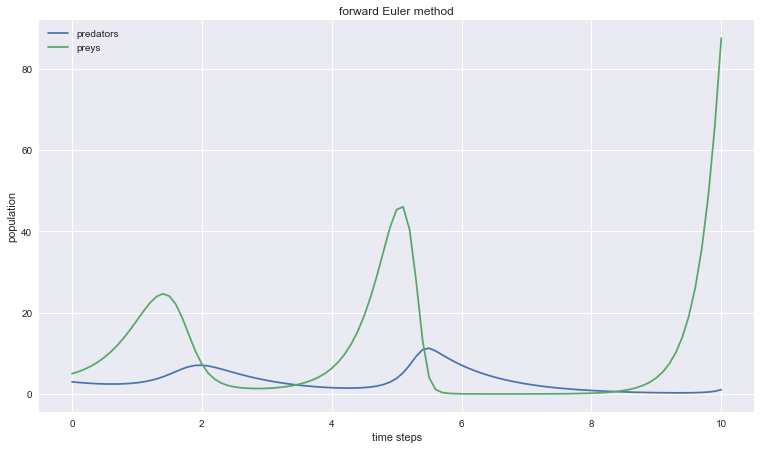

In [10]:
t2_fe, y2_fe = forward_euler(f2, y2_0, t2_0, t2_N, N2)

plt.plot(t2_fe, y2_fe[:, 0], label="predators")
plt.plot(t2_fe, y2_fe[:, 1], label="preys")
plt.title("forward Euler method")
plt.xlabel("time steps")
plt.ylabel("population")
plt.legend()
plt.show()

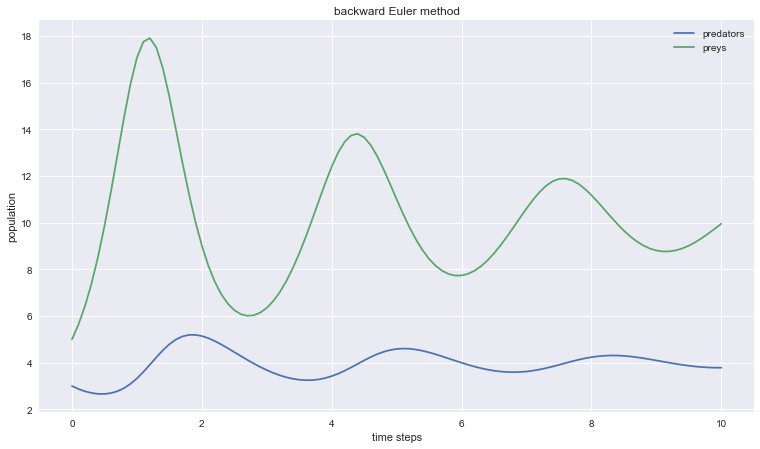

In [11]:
t2_be, y2_be = backward_euler(f2, y2_0, t2_0, t2_N, N2)

plt.plot(t2_be, y2_be[:, 0], label="predators")
plt.plot(t2_be, y2_be[:, 1], label="preys")
plt.title("backward Euler method")
plt.xlabel("time steps")
plt.ylabel("population")
plt.legend()
plt.show()

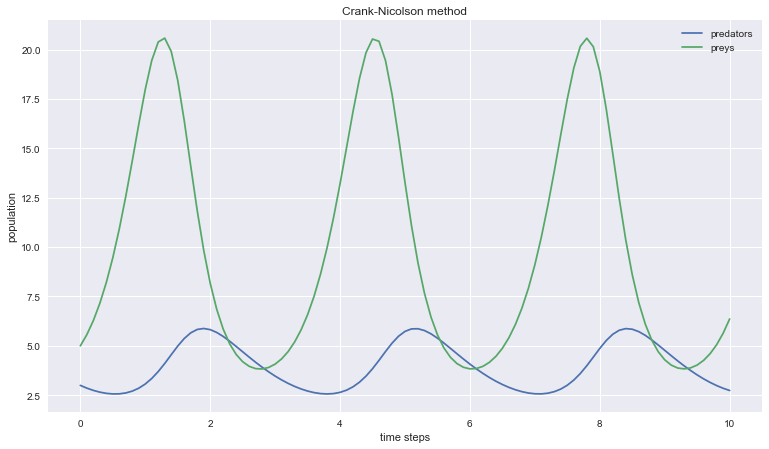

In [12]:
t2_cn, y2_cn = crank_nicolson(f2, y2_0, t2_0, t2_N, N2)

plt.plot(t2_cn, y2_cn[:, 0], label="predators")
plt.plot(t2_cn, y2_cn[:, 1], label="preys")
plt.title("Crank-Nicolson method")
plt.xlabel("time steps")
plt.ylabel("population")
plt.legend()
plt.show()

Method comparison for 1000 steps:

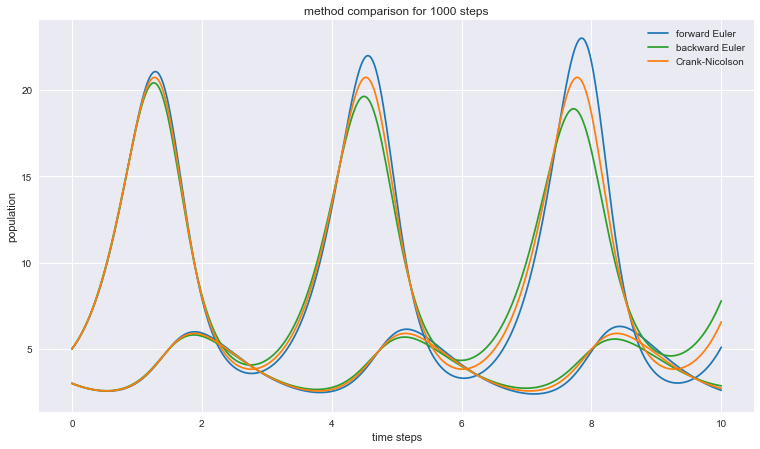

In [13]:
N3 = 1000
t3_fe, y3_fe = forward_euler(f2, y2_0, t2_0, t2_N, N3)
t3_be, y3_be = backward_euler(f2, y2_0, t2_0, t2_N, N3)
t3_cn, y3_cn = crank_nicolson(f2, y2_0, t2_0, t2_N, N3)

plt.plot(t3_fe, y3_fe[:, 0], "tab:blue", label="forward Euler")
plt.plot(t3_fe, y3_fe[:, 1], "tab:blue")
plt.plot(t3_be, y3_be[:, 0], "tab:green", label="backward Euler")
plt.plot(t3_be, y3_be[:, 1], "tab:green")
plt.plot(t3_cn, y3_cn[:, 0], "tab:orange", label="Crank-Nicolson")
plt.plot(t3_cn, y3_cn[:, 1], "tab:orange")
plt.title("method comparison for 1000 steps")
plt.xlabel("time steps")
plt.ylabel("population")
plt.legend()
plt.show()